In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wave

In [ ]:
data=pd.read_csv("/content/training data.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()
 
data['label']= label_encoder.fit_transform(data['label'])
data.head(100)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.107009,0.081313,0.102788,0.025164,0.188941,0.163778,24.705118,714.696895,0.891348,0.576778,...,0.107009,0.075907,0.016000,0.222222,0.007812,0.007812,0.007812,0.000000,0.000000,1
96,0.119006,0.083083,0.106214,0.045520,0.200087,0.154566,26.879675,812.204086,0.883926,0.604149,...,0.119006,0.092961,0.016360,0.175824,0.007812,0.007812,0.007812,0.000000,0.000000,1
97,0.082526,0.080918,0.061245,0.008307,0.129657,0.121350,15.891002,402.932610,0.906001,0.561684,...,0.082526,0.087384,0.015810,0.271186,0.007979,0.007812,0.015625,0.007812,0.043478,1
98,0.130674,0.082882,0.116964,0.082283,0.204857,0.122574,27.705119,896.650347,0.900403,0.584464,...,0.130674,0.090380,0.016615,0.238806,0.007812,0.007812,0.007812,0.000000,0.000000,1


In [ ]:
print ( data.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [ ]:
index_no = data.columns.get_loc('meanfun')
print(index_no)

12


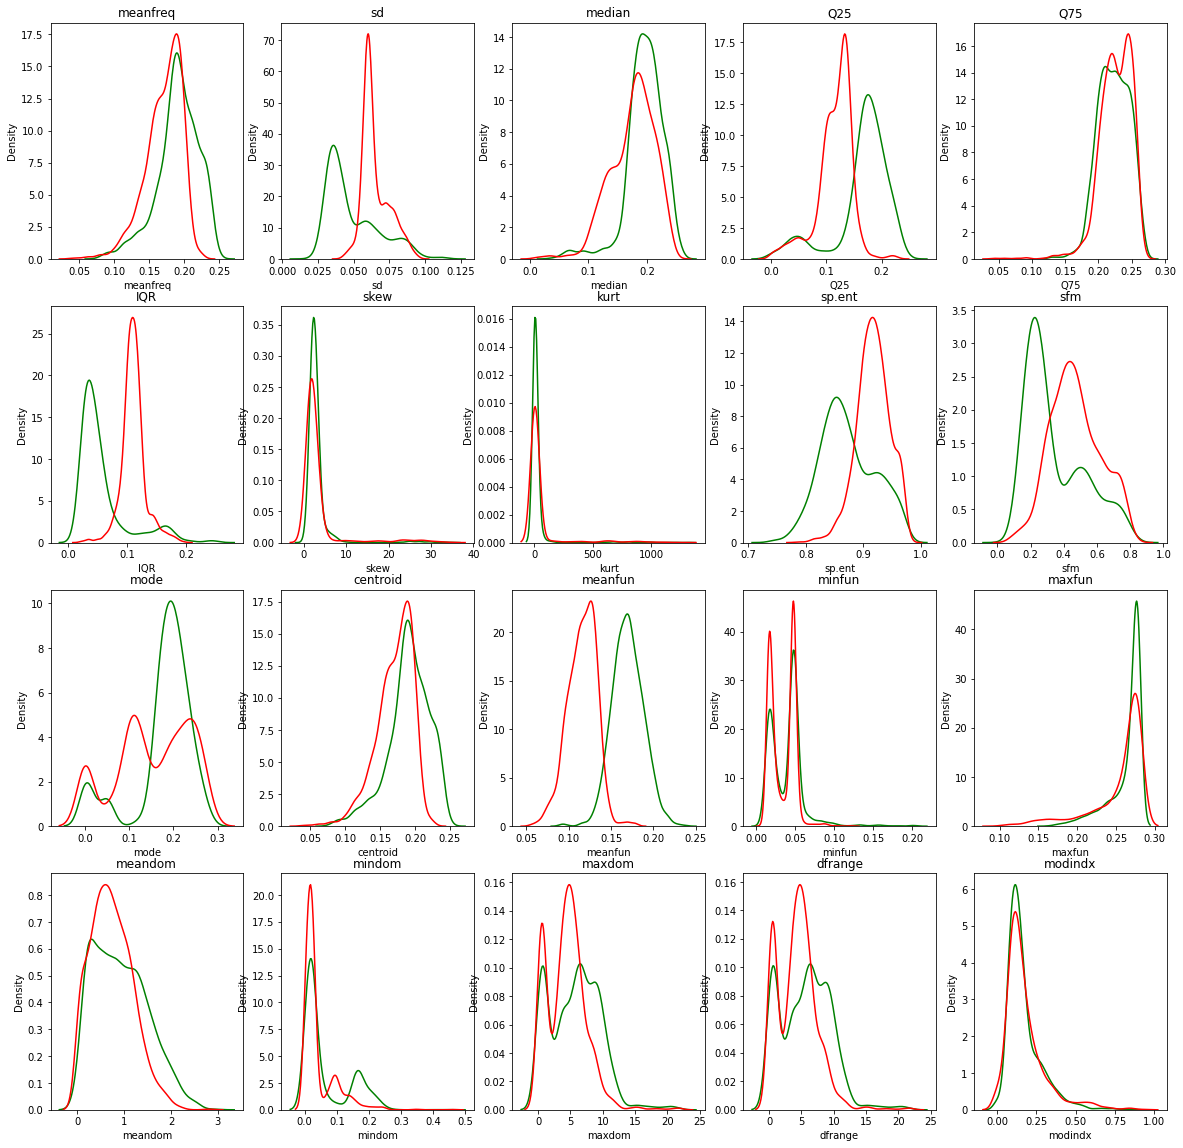

In [ ]:
plt.subplots(4,5,figsize=(20,20))
for k in range(1,21):
    plt.subplot(4,5,k)
    plt.title(data.columns[k-1])
    sns.kdeplot(data.loc[data['label'] == 0, data.columns[k-1]], color= 'green', label='F')
    sns.kdeplot(data.loc[data['label'] == 1, data.columns[k-1]], color= 'red', label='M')

<ipython-input-66-541bbe0b0f6e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(2,2))


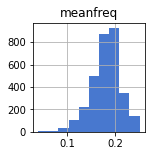

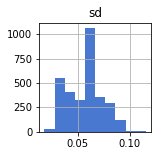

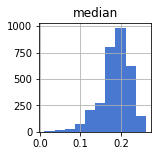

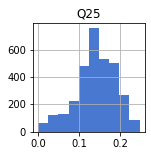

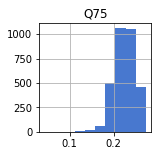

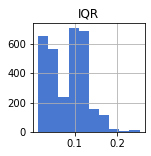

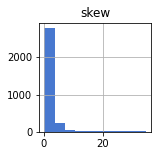

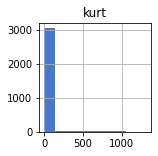

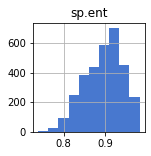

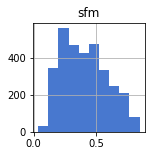

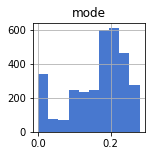

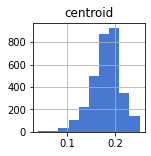

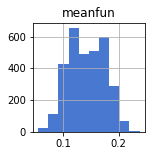

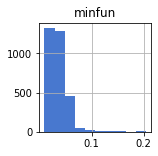

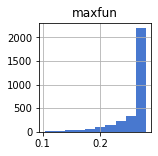

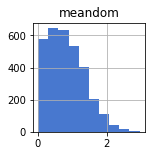

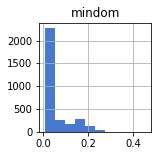

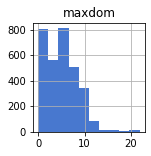

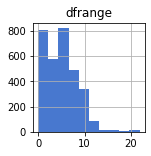

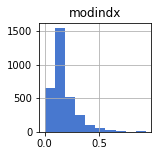

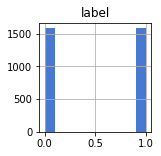

In [ ]:
for col in data.columns:
    fig = plt.figure(figsize=(2,2))
    plt.title(f"{col}")
    data[col].hist()

In [ ]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [ ]:
X = data[['meanfun' , 'minfun', 'maxfun','sd','IQR']].values
y_ = data['label'].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [ ]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meanfun'>

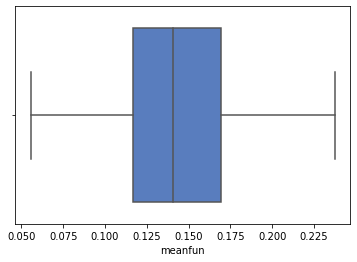

In [ ]:
#checking outliers by boxplots
sns.boxplot(data['meanfun'])
#no outliers

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minfun'>

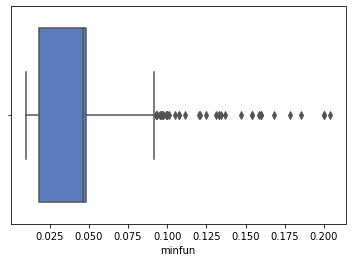

In [ ]:
#checking outliers by boxplots
sns.boxplot(data['minfun'])
#outliers detected

(array([  37,  328,  432, 1614, 1652, 1730, 1776, 1782, 1813, 1977, 1981,
       1996, 2087, 2115, 2164, 2166, 2254, 3011, 3012, 3018, 3019, 3021,
       3027, 3029, 3030, 3033, 3035, 3040, 3041, 3047, 3048, 3050, 3052,
       3055, 3059, 3060, 3062, 3161]),)
(array([], dtype=int64),)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minfun'>

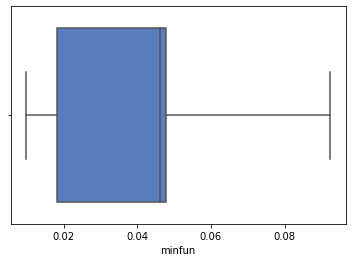

In [ ]:
#detect outliers of minfun location 
max = 0.047904 +(1.5*0.029681)

out = np.where(data['minfun']>max)
print(out)

for i in out:
    data.at[i,'minfun'] = max

out = np.where(data['minfun']>max)
print (out)

#checking outliers by boxplots
sns.boxplot(data['minfun'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maxfun'>

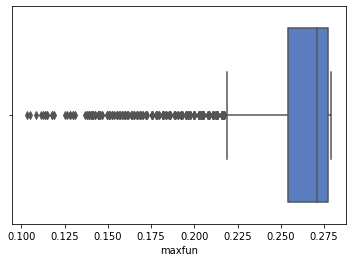

In [ ]:
#checking outliers by boxplots
sns.boxplot(data['maxfun'])
#outliers detected

(array([   7,   10,   12,   19,   20,   22,   23,   29,   30,   35,   37,
         38,   47,   49,   50,   51,   71,   84,   85,   91,   92,   96,
        107,  109,  110,  113,  114,  115,  117,  118,  134,  165,  195,
        196,  209,  215,  218,  299,  314,  320,  321,  322,  323,  330,
        336,  337,  338,  339,  340,  345,  349,  353,  355,  356,  360,
        363,  371,  372,  373,  374,  375,  377,  379,  380,  383,  386,
        388,  390,  393,  395,  397,  398,  402,  404,  405,  408,  410,
        411,  415,  420,  422,  423,  427,  430,  431,  432,  434,  435,
        438,  439,  441,  442,  443,  444,  446,  447,  448,  449,  450,
        451,  474,  481,  483,  515,  516,  529,  531,  534,  535,  536,
        539,  541,  542,  543,  546,  549,  556,  558,  567,  580,  584,
        586,  588,  597,  599,  601,  602,  605,  606,  610,  612,  613,
        616,  622,  623,  624,  630,  634,  639,  646,  657,  659,  673,
        677,  678,  680,  681,  682,  685,  686,  

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maxfun'>

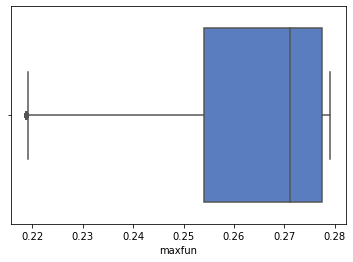

In [ ]:
#detect outliers of maxfun location 
min =  0.253968 - (1.5*0.023489)  

out = np.where(data['maxfun'] < min)
print(out)

for i in out:
    data.at[i,'maxfun'] = min

out = np.where(data['maxfun'] < min)
print (out)

#checking outliers by boxplots
sns.boxplot(data['maxfun'])


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sd'>

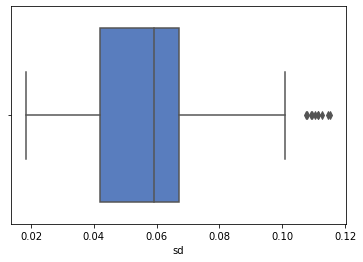

In [ ]:
#checking outliers by boxplots
sns.boxplot(data['sd'])
#outliers detected

(array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930]),)
(array([], dtype=int64),)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sd'>

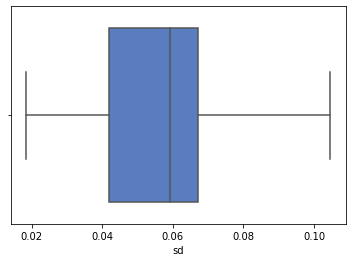

In [ ]:
#detect outliers of sd location 
max = 0.067020 +(1.5*0.025066)

out = np.where(data['sd']>max)
print(out)

for i in out:
    data.at[i,'sd'] = max

out = np.where(data['sd']>max)
print (out)

#checking outliers by boxplots
sns.boxplot(data['sd'])


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IQR'>

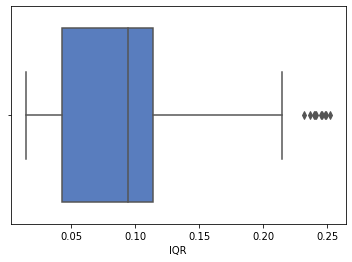

In [ ]:
#checking outliers by boxplots
sns.boxplot(data['IQR'])
#outliers detected

(array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930]),)
(array([], dtype=int64),)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IQR'>

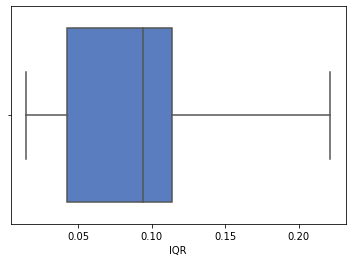

In [ ]:
#detect outliers of IQR location 
max =  0.114175	+ (1.5*0.071615)

out = np.where(data['IQR']>max)
print(out)

for i in out:
    data.at[i,'IQR'] = max

out = np.where(data['IQR']>max)
print (out)

#checking outliers by boxplots
sns.boxplot(data['IQR'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3, random_state=10)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [ ]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9789695057833859


In [ ]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.979757085020243


In [ ]:
import joblib
joblib.dump(svc,"ML.joblib")

['ML.joblib']

In [ ]:
print(y_pred)

[0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1
 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1
 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0
 0 0 1 0 1 0 0 1 0 1 1 1 

In [ ]:
print(X_test)

[[0.18455291 0.04819277 0.27745665 0.03140139 0.03322034]
 [0.12377071 0.047105   0.27428571 0.05897891 0.11452055]
 [0.13532741 0.04766634 0.27586207 0.06059576 0.09694042]
 ...
 [0.19879842 0.0776699  0.27586207 0.08688903 0.16719905]
 [0.12387811 0.04873096 0.27906977 0.05728988 0.1083247 ]
 [0.18462149 0.0245023  0.27586207 0.03362206 0.02455115]]


In [ ]:
import matplotlib.style as ms
import matplotlib.pyplot as plt
import numpy as np
ms.use('seaborn-muted')
import librosa 
import librosa.display

import IPython.display as ipd


In [ ]:
y, sr= librosa.load('recording4.wav')

In [ ]:
ipd.Audio(y,rate=sr)

In [ ]:
S = librosa.feature.melspectrogram(y,sr=sr)
log_S= librosa.power_to_db(S, ref=np.max)

In [ ]:
mfcc = librosa.feature.mfcc(S=log_S,n_mfcc=13)

In [ ]:
onset_env = librosa.onset.onset_strength(y,sr=sr)
tempo = librosa.beat.tempo(onset_env,sr=sr)
tempo

/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=174
  warnings.warn(


array([117.45383523])

In [ ]:
y_harmonic,y_precussive = librosa.effects.hpss(y)
tempo,beats = librosa.beat.beat_track(y=y_precussive,sr=sr)

In [ ]:
df=pd.DataFrame(S)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,0.000583,0.004227,0.007183,0.003305,0.006661,0.006806,0.006237,0.012228,0.007631,0.024495,...,0.094681,0.057138,0.067494,0.088930,0.067864,0.042942,0.020537,0.012303,0.019829,0.008971
1,0.007369,0.024614,0.018942,0.011476,0.016994,0.019960,0.008905,0.012259,0.020957,0.021716,...,0.134093,0.059729,0.090453,0.044757,0.067587,0.062483,0.022299,0.029623,0.033628,0.071922
2,0.006085,0.013835,0.008706,0.006289,0.011505,0.009329,0.005046,0.004396,0.012639,0.011976,...,0.033384,0.020497,0.013714,0.006528,0.010564,0.012964,0.006895,0.008904,0.016013,0.039642
3,0.001177,0.001698,0.000233,0.000138,0.000728,0.002289,0.005251,0.003397,0.001628,0.004796,...,0.000398,0.001125,0.001844,0.001512,0.001070,0.001070,0.000598,0.000765,0.002489,0.005264
4,0.021378,0.049920,0.099021,0.118489,0.228431,0.649628,1.719043,3.413116,4.752305,6.276490,...,0.000773,0.001090,0.001058,0.001076,0.001642,0.001481,0.000499,0.001703,0.005947,0.008029


In [ ]:
df.columns

RangeIndex(start=0, stop=341, step=1)

In [ ]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,1.000000,0.995827,0.989745,0.990718,0.991646,0.996410,0.989407,0.966538,0.925778,0.948739,...,0.198764,0.234521,0.296122,0.339739,0.728349,0.739245,0.451893,0.344416,0.802909,0.764873
1,0.995827,1.000000,0.998592,0.998921,0.998947,0.999274,0.976752,0.948178,0.893797,0.924848,...,0.152743,0.198749,0.275213,0.319191,0.692378,0.694541,0.401865,0.306527,0.773106,0.724579
2,0.989745,0.998592,1.000000,0.999962,0.999676,0.997413,0.966261,0.934610,0.872234,0.907854,...,0.122193,0.174416,0.260062,0.304486,0.665547,0.662079,0.367799,0.281066,0.749926,0.694631
3,0.990718,0.998921,0.999962,1.000000,0.999800,0.997884,0.967925,0.936659,0.875473,0.910293,...,0.125532,0.177323,0.261841,0.306164,0.669061,0.666389,0.371957,0.284027,0.753099,0.698818
4,0.991646,0.998947,0.999676,0.999800,1.000000,0.998428,0.970090,0.939352,0.879318,0.913754,...,0.125115,0.176308,0.260805,0.305849,0.667909,0.665108,0.371112,0.284018,0.752257,0.697855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0.739245,0.694541,0.662079,0.666389,0.665108,0.697107,0.779170,0.799576,0.854607,0.804556,...,0.616742,0.582989,0.489043,0.523907,0.927095,1.000000,0.879886,0.653604,0.898107,0.952643
337,0.451893,0.401865,0.367799,0.371957,0.371112,0.404707,0.498872,0.526611,0.601276,0.543972,...,0.681183,0.611071,0.473888,0.550718,0.803648,0.879886,1.000000,0.796453,0.770084,0.826248
338,0.344416,0.306527,0.281066,0.284027,0.284018,0.309444,0.380902,0.394077,0.446030,0.415201,...,0.654302,0.421542,0.331543,0.392912,0.586419,0.653604,0.796453,1.000000,0.785791,0.723741
339,0.802909,0.773106,0.749926,0.753099,0.752257,0.774763,0.823692,0.824472,0.847767,0.826463,...,0.546934,0.431671,0.394977,0.445581,0.836013,0.898107,0.770084,0.785791,1.000000,0.966675


In [ ]:
import scipy

freqs = np.fft.fftfreq(y.size)
def describe_freq(freqs):
    std = np.std(freqs) 
    iqr=scipy.stats.iqr(freqs)
    return std,iqr 
  


In [ ]:
print(freqs)

[ 0.00000000e+00  1.12897399e-05  2.25794798e-05 ... -3.38692197e-05
 -2.25794798e-05 -1.12897399e-05]


In [ ]:
print()

In [ ]:
import librosa

# Load audio file
audio_file_path = 'recording4.wav'
signal, sr = librosa.load(audio_file_path, sr=None)

# Extract fundamental frequency
f0, voiced_flag, voiced_probs = librosa.pyin(signal, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Print fundamental frequency
print('Fundamental frequency:', f0)



Fundamental frequency: [        nan         nan 77.33375604 77.78174593 77.78174593 77.78174593
 77.33375604 76.0052084  73.41619198 74.26924704 73.41619198 72.99334583
 71.73936384 70.91536696 70.50692451 72.15494574 72.15494574 70.91536696
 70.50692451 70.1008345  69.69708341 68.49972923 69.29565774 68.89654412
 68.49972923 68.49972923 68.89654412 68.89654412 68.49972923 70.91536696
 71.32617551 70.1008345  69.69708341 69.29565774 69.29565774 68.89654412
 68.10519982 66.93519325 65.40639133 65.40639133 68.49972923 70.1008345
 66.93519325 66.93519325 66.93519325 65.40639133 65.40639133 67.71294273
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan     

In [ ]:
dff=pd.DataFrame(f0)
dff.head()

,0
0,NaN
1,NaN
2,77.333756
3,77.781746
4,77.781746


In [ ]:
dff.isnull().sum()
new_df = dff.fillna(72)
new_df

,0
0,72.000000
1,72.000000
2,77.333756
3,77.781746
4,77.781746
...,...
342,72.000000
343,72.000000
344,72.000000
345,72.000000


In [ ]:
dff.mean()


0    72.782409
dtype: float64

In [ ]:
mean = dff.mean() 
print(mean)
min = dff.min()
print(min)
max = dff.max()
print(max)

0    72.782409
dtype: float64
0    65.406391
dtype: float64
0    83.364411
dtype: float64


In [ ]:
s , i = describe_freq(freqs)
pred = model.predict( [[mean , min , max , s , i]])
print( pred )

[0]


In [ ]:
model= joblib.load("ML.joblib")
